# Import Data
Use the Pillow Library, the most popular image importing library with `pip install Pillow`
And numpy, which is more universal, can be installed with `pip install numpy`, for dealing with arrays of numbers.

(417, 250, 4)


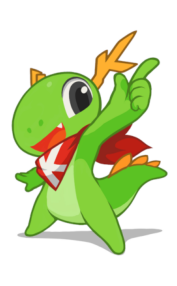

In [1]:
# Set up for showing widgets
from ipywidgets import interact, interactive, interact_manual, fixed
import ipywidgets as IPyWidgets
import matplotlib.pyplot as PltLib

# Importing PIL and numpy.asarray()
from PIL import Image
from numpy import asarray

# Open and convert image to 3D array
init_img = Image.open('./assetdata/konqi.png')
our_img_c = asarray(init_img)

# Show Image
ignore, color_image_widget = PltLib.subplots(1, figsize=(8, 5))
color_image_widget.imshow(our_img_c, cmap='gray')
color_image_widget.axis('off')
print(our_img_c.shape)

# Make the Color Image Grayscale
Use the percentages of Cones in the Human Eye to convert to grayscale.

(417, 250)


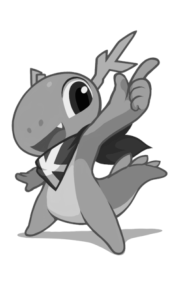

In [2]:
# importing numpy
import numpy as Num

# Make Grayscale
def make_grayscale_image(img: list) -> list:
	"""
 		Convert a Color image, represented as a Number List to a 
 		Grayscale image represented as a Number List
	"""
	CONVERSIONS_FOR_RGB = [0.2989, 0.587, 0.114]
	return Num.dot(img[..., :3], CONVERSIONS_FOR_RGB)

our_img = make_grayscale_image(our_img_c)

# Show Image
ignore, color_image_widget = PltLib.subplots(1, figsize=(8, 5))
color_image_widget.imshow(our_img, cmap='gray')
color_image_widget.axis('off')
print(our_img.shape)

# Apply SVD Techniques
Use numpy's linalg library, which provides a `svd()` function, returning $U, \Sigma, V$ which we call u, s, v in our code.

In [3]:
# Importing svd()
from numpy.linalg import svd

# Grayscale SVD compresser
def compress_grayscale_svd(mat: list, k: int):
  """
  Preform SVD and truncate with k

  Args:
      mat (list): Grayscale image as an 2D array
      k (int): Max Rank

  Returns:
      list: The reconstructed matrix representation of the image
      int: array of singular values
  """
  # Pull U, Sigma and V out of function based on input matrix
  u, s, v = svd(mat, full_matrices=False)
  
  # Reconstructed Matrix from U, Sigma, and V up to a rank k
  reconstructed_matrix = Num.dot(u[:,:k], Num.dot(Num.diag(s[:k]), v[:k,:]))
  return reconstructed_matrix, s


In [4]:
# Set Up Widgets
def show_compressed_grayscale_image(img: list, k: int):
  """
  Preforms and displays SVD compression
  
  Args:
      mat (list): Grayscale image as an 2D array
      k (int): Max Rank
   """
  reconstructed_img, sigma = compress_grayscale_svd(img, k)
  figure, xy_axises = PltLib.subplots(1, 2, figsize=(8, 5))
  xy_axises[0].plot(sigma)
  compression_ratio = 100.0 * (k * (img.shape[0] + img.shape[1]) + k) / (img.shape[0] * img.shape[1])
  xy_axises[1].set_title("Compression Ratio is {:.2f}%".format(compression_ratio))
  xy_axises[1].imshow(reconstructed_img, cmap='gray')
  xy_axises[1].axis('off')
  figure.tight_layout()
  print(reconstructed_img.shape)
  
def compute_k_max(img: list):
  a, b = img.shape
  return a * b / (a + b + 1)

k_slider_widget = IPyWidgets.IntSlider(min=1, max=compute_k_max(our_img))

def update_k_max(*args):
  k_slider_widget.max = compute_k_max(our_img)

In [5]:
# Show Widgets
interact(show_compressed_grayscale_image, img=fixed(our_img), k=k_slider_widget)

interactive(children=(IntSlider(value=1, description='k', max=156, min=1), Output()), _dom_classes=('widget-in…

<function __main__.show_compressed_grayscale_image(img: list, k: int)>